In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
%matplotlib inline
plt.style.use('seaborn')

In [3]:
import numpy as np
import sklearn
import matplotlib
import pandas as pd
import sys
libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.6.2 |Anaconda custom (64-bit)| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.12.1
Pandas Version: 0.20.3


In [175]:
import numpy as np

class make_classification:
    
    def __init__(self):
        self.model_params = None
        self.num_feats = None
        self.random_state = None
        self.is_clean = None
        self.noise = None
        
    def build_dataset(self, num_feat=10, num_rows_per_class=100, num_classes=2, random_state = None, num_important=10, 
                      misclassify=0.01, dirty_data=False):
        assert num_feat > 0 and num_rows_per_class > 0, "Must have rows and features > 0."
        
        if random_state:
            np.random.seed(random_state)
            self.random_state = random_state
        
        if num_important > num_feat:
            num_important = num_feat
            
        self.num_important = num_important
        self.num_feats = num_feat

        means = np.random.uniform(-1,1,size=(num_classes, num_important))
        sigmas = np.random.uniform(1e-6,0.5,size=(num_classes, num_important))
        
        X = np.empty(num_important)
        y = np.zeros(num_rows_per_class)
        for i in range(0,num_classes):
            new_X = np.random.normal(means[i][0],sigmas[i][0],num_rows_per_class).reshape(-1,1)
            for j in range(1,num_important):
                col_X = np.random.normal(means[i][j],sigmas[i][j],num_rows_per_class).reshape(-1,1)
                new_X = np.hstack((new_X, col_X))
            if not i:
                X = np.vstack((X, new_X))[1:]
            else:
                X = np.vstack((X, new_X))
                y = np.hstack((y,[i]*num_rows_per_class))  
        
        # fill in the rest of the unimportant columns
        means = np.random.uniform(-1,1,num_feat-num_important)
        sigmas = np.random.uniform(1e-6,0.5, num_feat-num_important)
        for i in range(num_feat-num_important):
            X = np.hstack((X,np.random.normal(means[i],sigmas[i],X.shape[0]).reshape(-1,1)))
    
        #shuffle rows
        permute = np.random.permutation(len(X))
        X = X[permute]
        y = y[permute]
        
        #shuffle columns
        np.random.shuffle(X.T)
        
        if dirty_data:
            X = self.muck_up_data(X)
            
        return X, y
    
    def muck_up_data(self, X, dup_cols=True, add_nan=True, combine_feats=True):
        if dup_cols:
            X = self._add_duplicate_columns(X, dup_cols)
        if combine_feats:
            X = self._combine_features(X, combine_feats)
        if add_nan:
            X = self._add_nans(X, add_nan)
        return X
    
    def _add_duplicate_columns(self,X, dup_cols):
        if isinstance(dup_cols, float):
            num_to_dupe = int(dup_cols*X.size)   
        elif isinstance(dup_cols, bool):
            max_dupe = int((0.1*self.num_feats)+1.5)
            num_to_dupe = np.random.randint(1,max_dupe)
        elif isinstance(dup_cols, int):
            num_to_dupe = dup_cols
        else:
            raise TypeError('dup_cols must be type float, int, or bool.')
        
        cols_to_dup = np.random.choice(np.arange(self.num_feats), num_to_dupe, replace=False)
        new_X = np.hstack((X, X.T[cols_to_dup].T.reshape(-1,len(cols_to_dup))))
        return new_X
            
    def _combine_features(self, X, combine_feats):
        if isinstance(combine_feats, float):
            num_to_dupe = int(combine_feats*X.size) 
        elif isinstance(combine_feats, bool):
            max_dupe = int((0.1*self.num_feats)+1.5)
            num_to_dupe = np.random.randint(1,max_dupe)
        elif isinstance(combine_feats, int):
            num_to_dupe = combine_feats
        else:
            raise TypeError('combine_feats must be type float, int, or bool.')
        
        cols = np.random.choice(np.arange(self.num_feats), size=(num_to_dupe,2), replace=True)
        for col_set in cols:
            new_X = np.random.uniform(-1,1)*X.T[col_set[0]]+np.random.uniform(-1,1)*X.T[col_set[1]]
            X = np.hstack((X, new_X.T.reshape(-1,1)))
        return X
    
    def _add_nans(self, X, add_nan_val):
        if isinstance(add_nan_val, float):
            num_of_nans = int(add_nan_val*X.size)   
        elif isinstance(add_nan_val, int):
            num_of_nans = add_nan_val
        else:
            max_nans = int(0.1*X.size)
            num_of_nans = np.random.randint(1,max_nans)
            
        for _ in range(num_of_nans):
            i = np.random.randint(0,X.shape[0])
            j = np.random.randint(0,X.shape[1])
            X[i,j] = np.nan
        return X

In [202]:
mr = make_classification()
X,y = mr.build_dataset(num_classes=3, num_important=2, num_rows_per_class=200, num_feat=6, random_state=42)
X = mr.muck_up_data(X, dup_cols=True, add_nan=False, combine_feats=True)
X.shape

(600, 8)

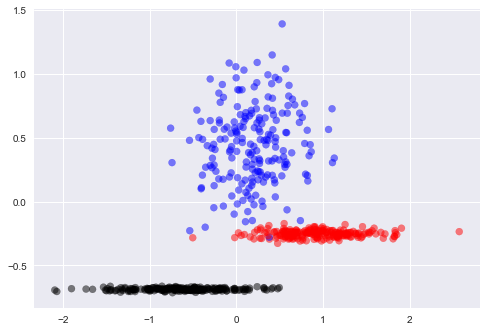

In [203]:
id_to_color = {0:'r',1:'b',2:'k',3:'y',4:'c',5:'m'}
cols = [id_to_color[i] for i in y]
plt.scatter(X[:,0],X[:,3],c=cols,alpha=0.5);

/Users/zachariahmiller/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


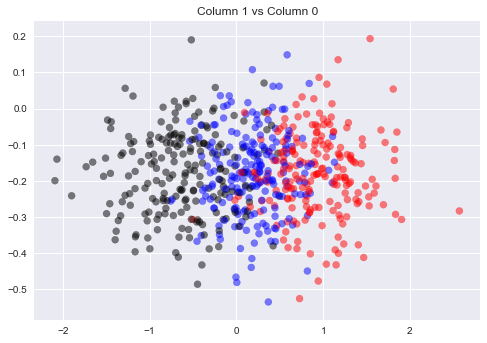

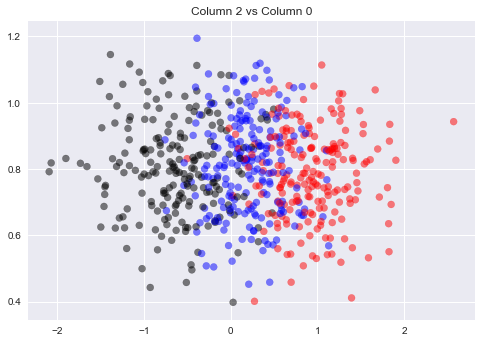

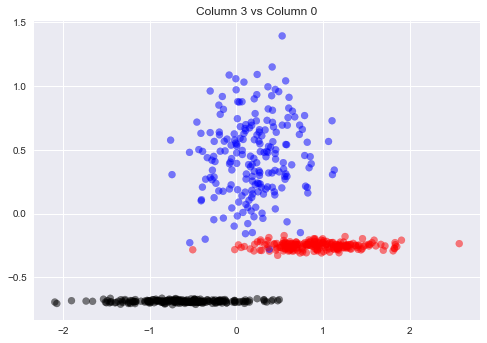

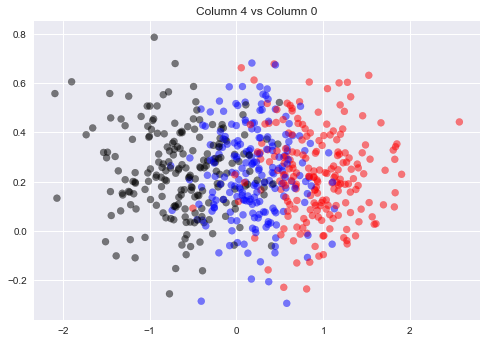

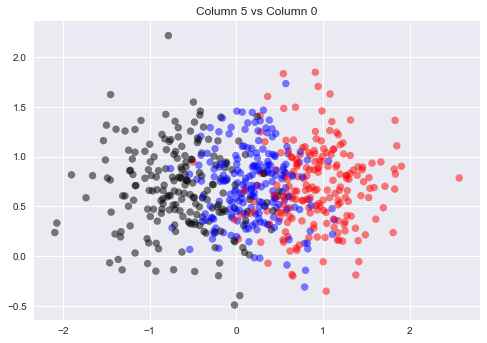

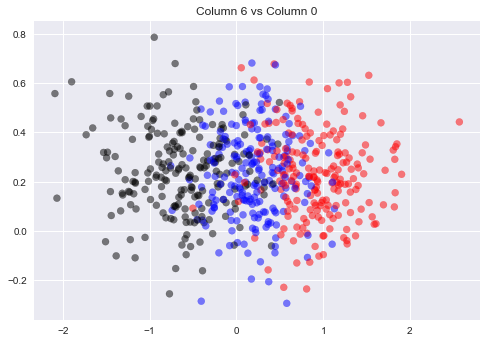

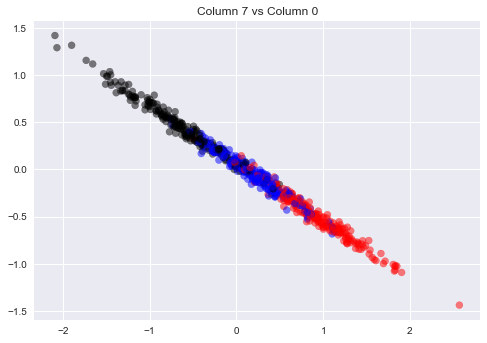

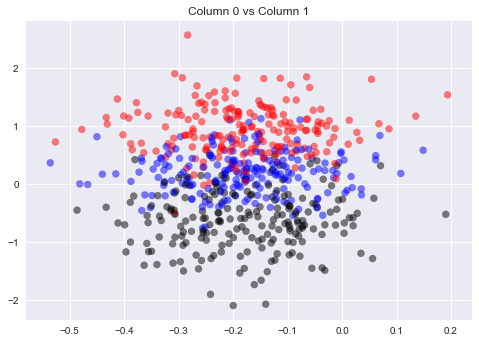

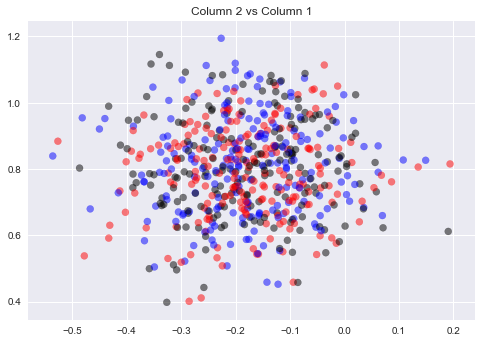

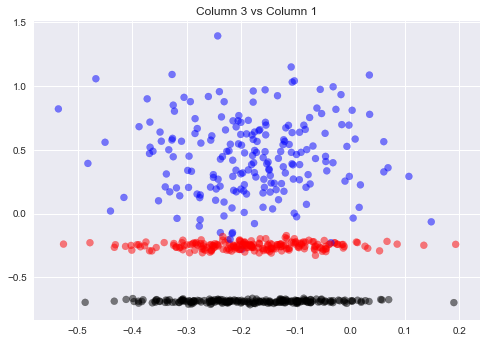

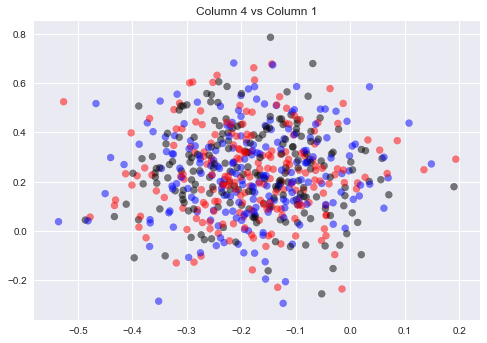

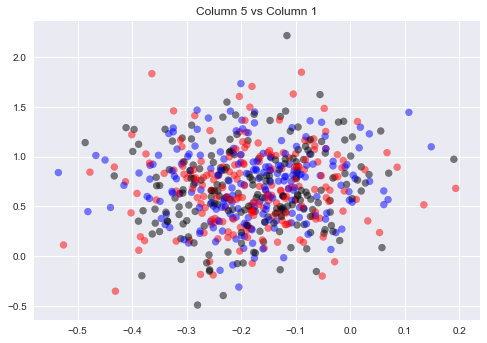

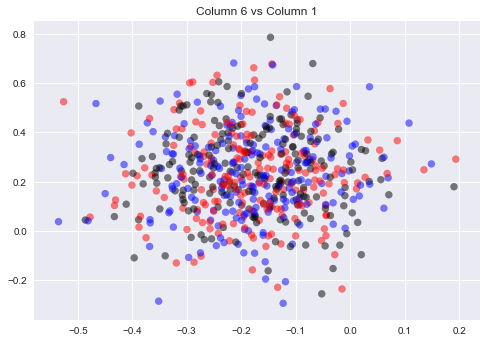

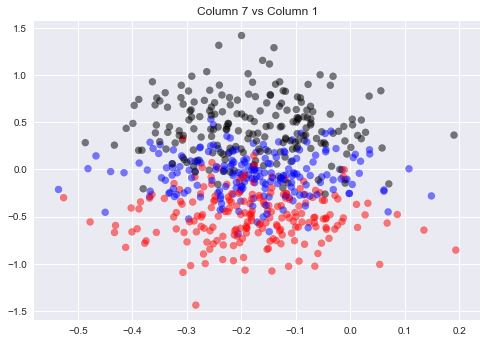

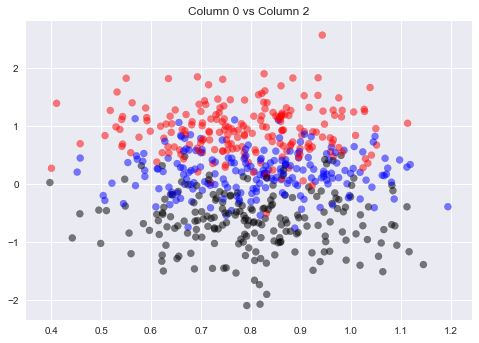

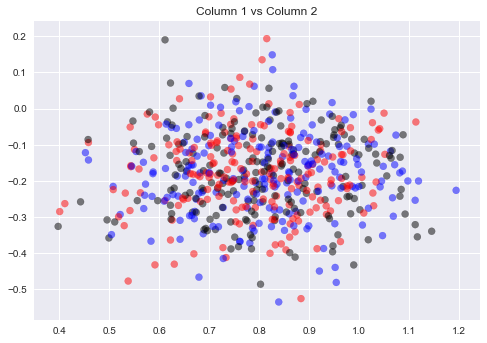

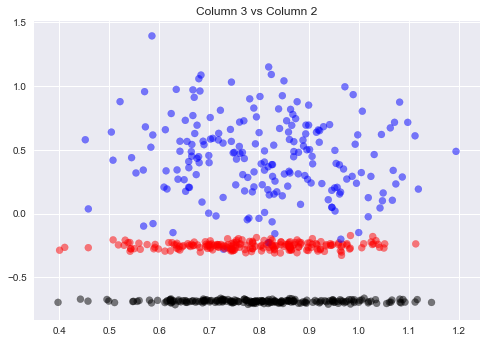

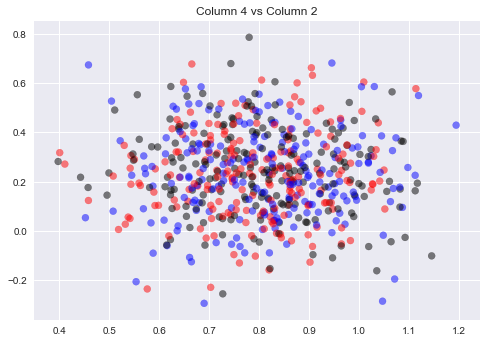

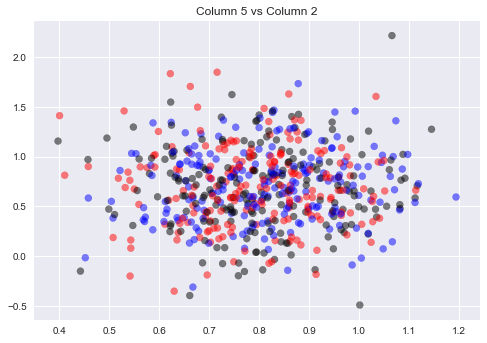

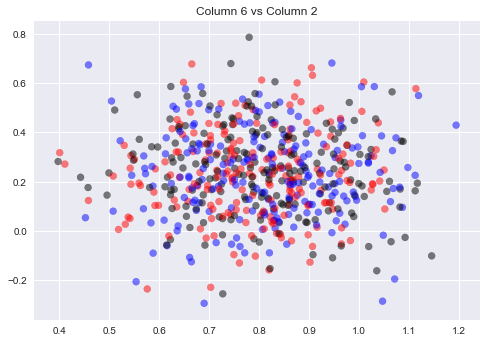

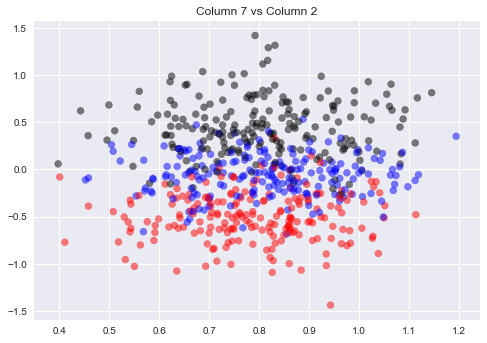

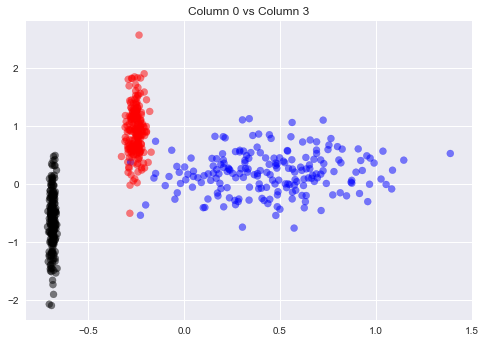

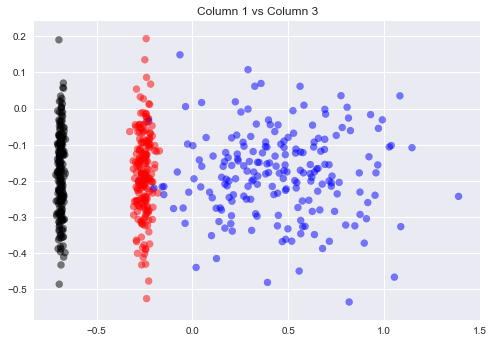

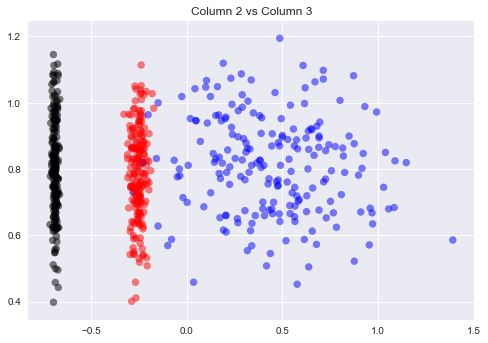

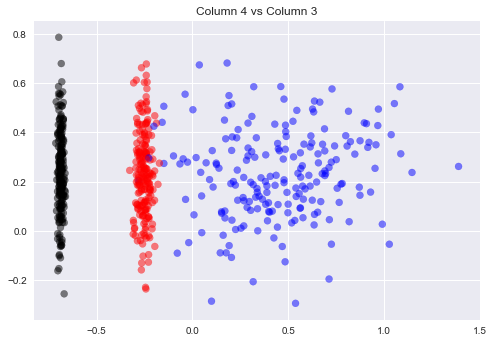

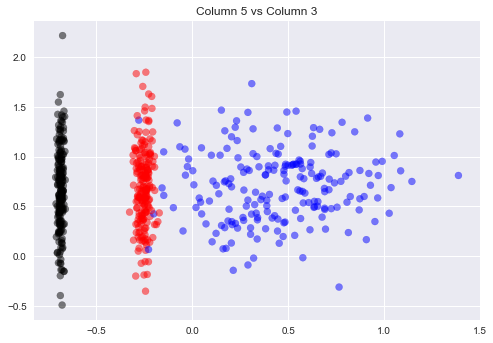

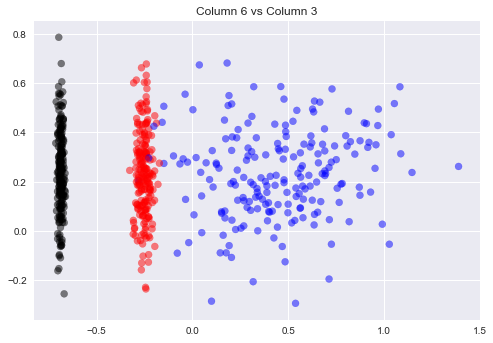

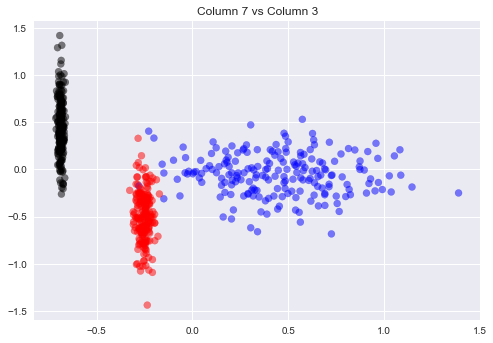

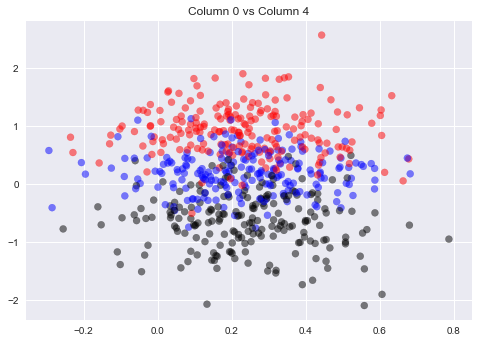

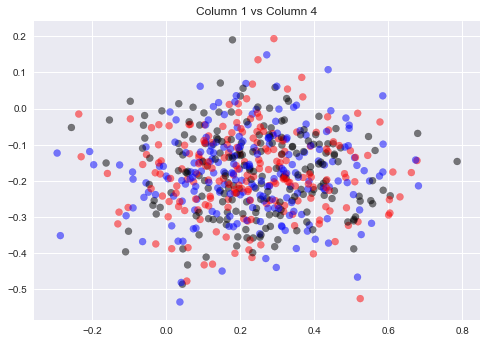

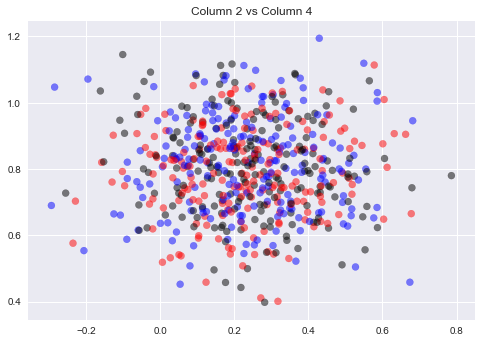

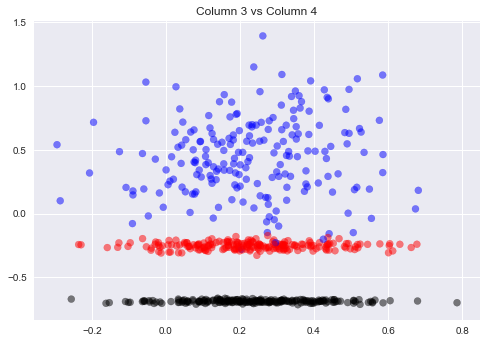

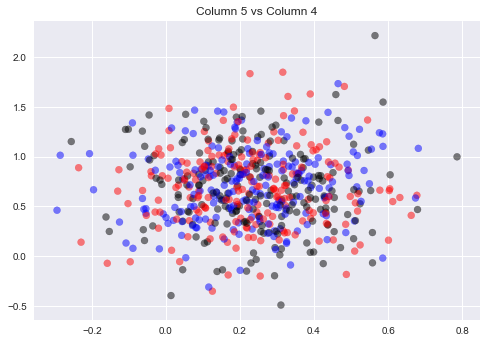

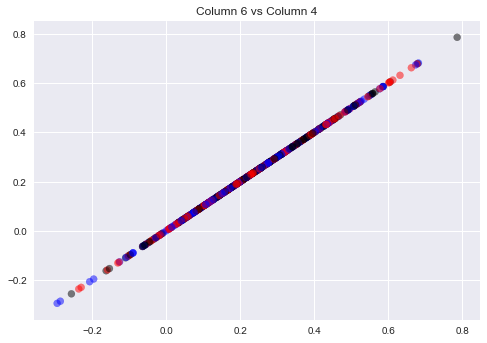

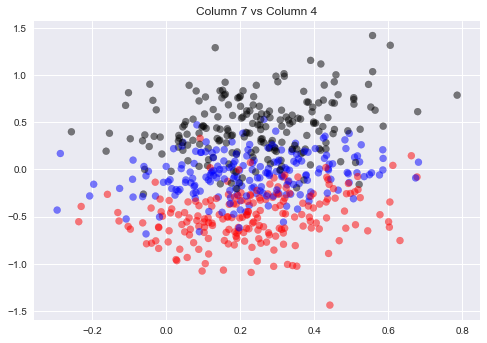

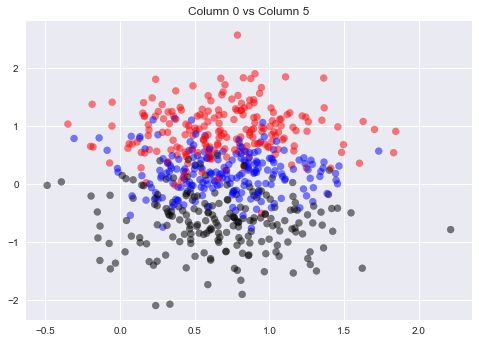

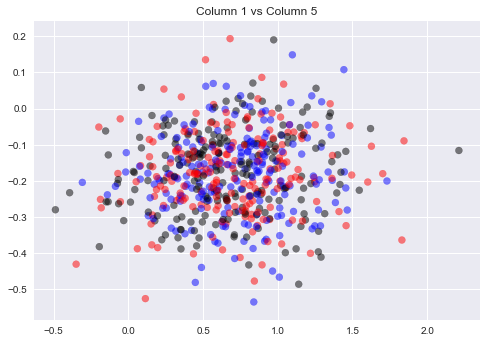

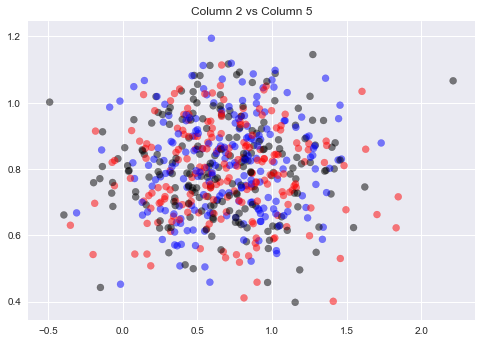

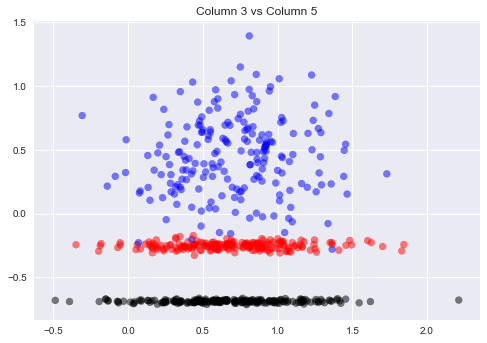

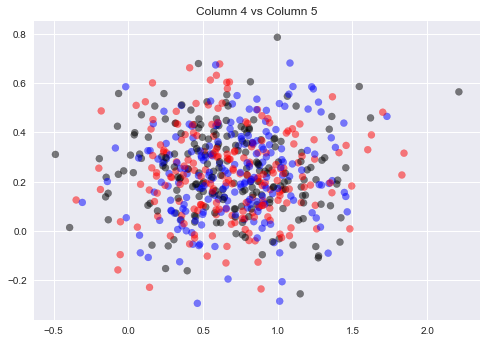

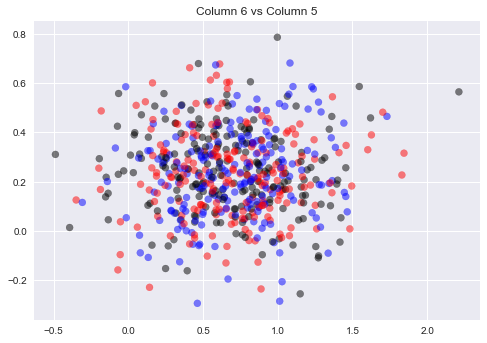

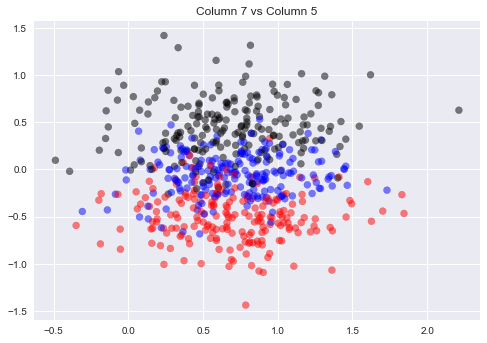

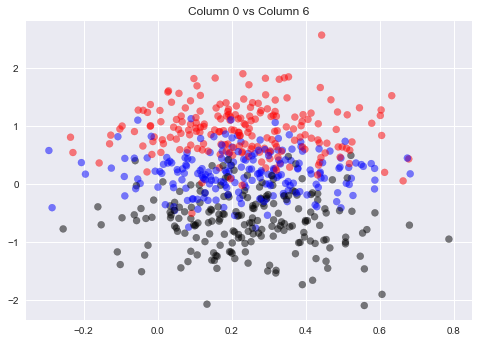

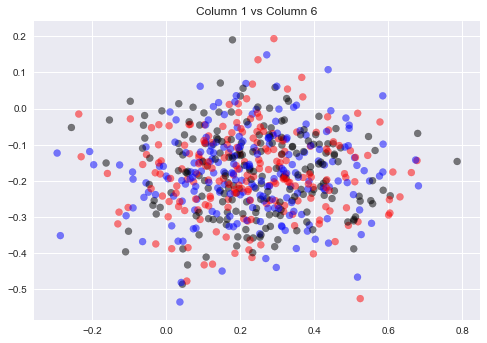

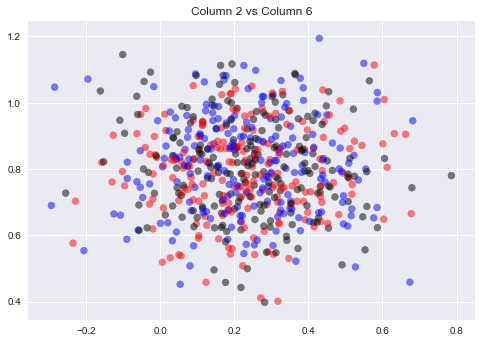

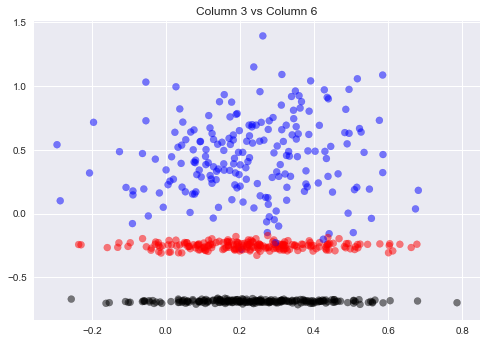

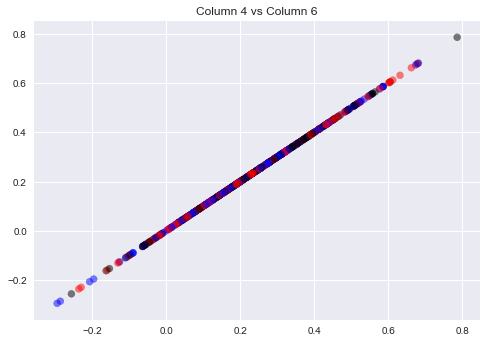

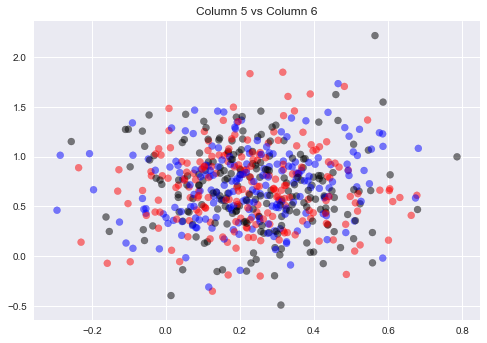

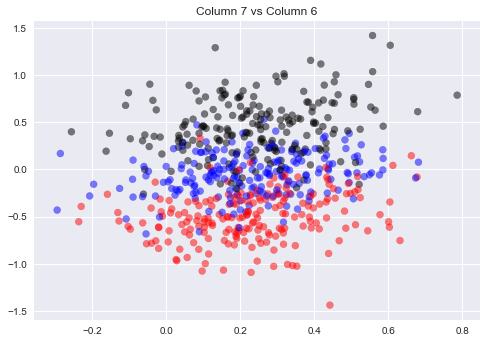

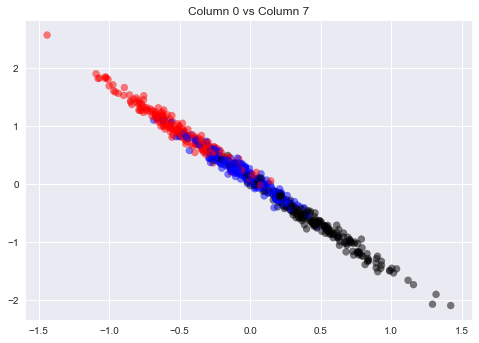

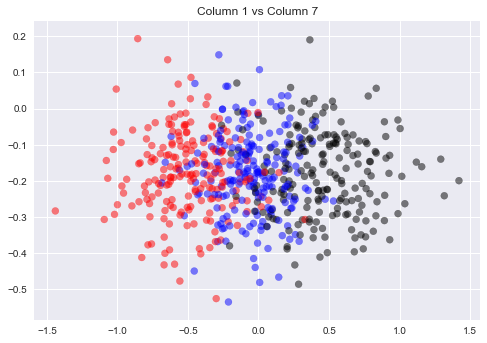

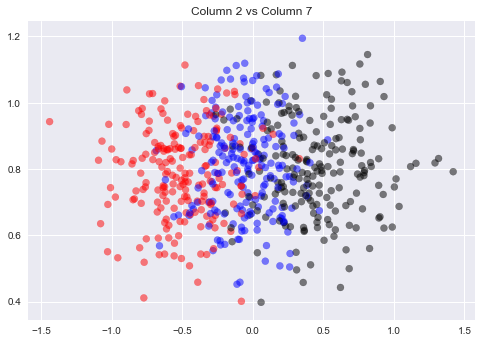

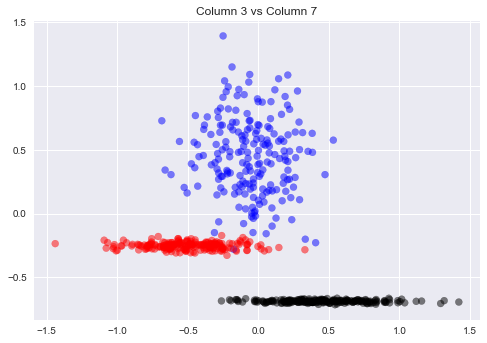

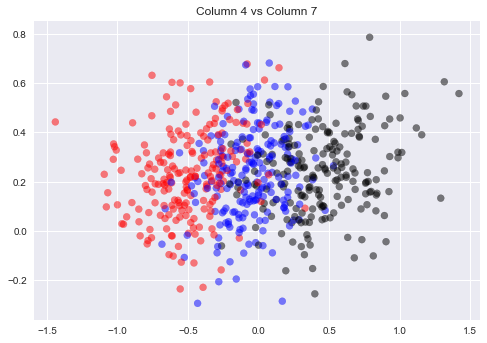

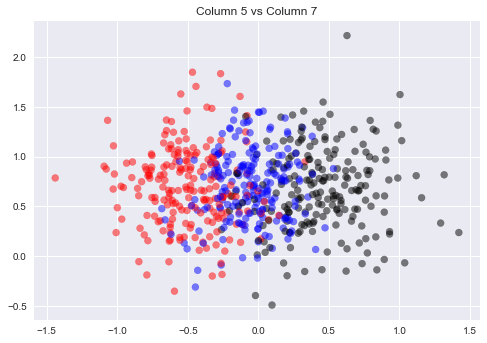

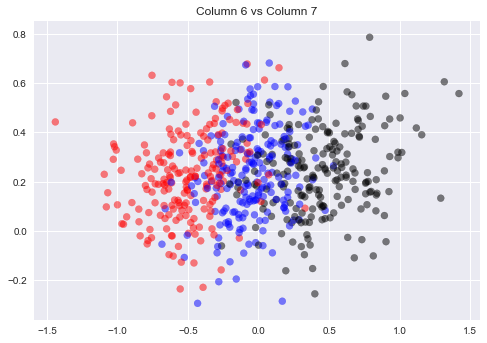

In [205]:
from itertools import product
for combo in list(product(list(range(X.shape[1])), list(range(X.shape[1])))):
    if combo[0] == combo[1]:
        continue
    plt.figure()
    plt.scatter(X[:,combo[0]],X[:,combo[1]], c=cols, alpha=0.5)
    plt.title("Column %i vs Column %i"%(combo[1],combo[0]))